In [4]:
# import libraries

import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## google drive mount -> for read file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/archive/movies_metadata.csv'

df = pd.read_csv(path)

# Check the head of the data
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df.drop(df.index[19730],inplace=True)
df.drop(df.index[29502],inplace=True)
df.drop(df.index[35585],inplace=True)

In [9]:
df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II


check row null value

In [10]:
df_numeric.isnull().sum()

budget            0
popularity        3
revenue           3
runtime         260
vote_average      3
vote_count        3
title             3
dtype: int64

Drop all the rows with null values

In [11]:
df_numeric['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [12]:
df_numeric.dropna(inplace=True)
# dropna : 결측값이 들어있는 행 전체 제거

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
df_numeric['vote_count'].quantile(np.arange(.74,1,0.01))
# quantile: 분위수

0.74      32.00
0.75      34.00
0.76      37.00
0.77      40.00
0.78      43.00
0.79      46.00
0.80      51.00
0.81      55.00
0.82      61.00
0.83      67.00
0.84      74.00
0.85      83.00
0.86      92.00
0.87     104.74
0.88     119.00
0.89     139.00
0.90     161.00
0.91     193.00
0.92     230.00
0.93     283.00
0.94     349.00
0.95     435.90
0.96     581.00
0.97     827.94
0.98    1243.88
0.99    2196.84
Name: vote_count, dtype: float64

In [14]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [15]:
df_numeric.shape

(12178, 7)

데이터 일반화

In [16]:
from sklearn import preprocessing

In [17]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))

In [18]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])
df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343
3,0.042105,0.007045,0.029216,0.144812,0.642105,0.000214
4,0.000000,0.015315,0.027468,0.120867,0.600000,0.010111


K-Means Clustering

K 선택

In [19]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [20]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

plot

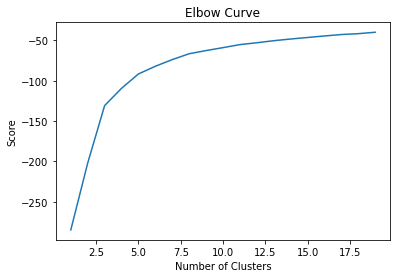

In [21]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

적합한 K=5

In [22]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)

KMeans(n_clusters=5)

In [23]:
len(kmeans.labels_)

12178

In [24]:
df_numeric['cluster'] = kmeans.labels_

In [25]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,3
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,1
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0


Clustring 결과 해석

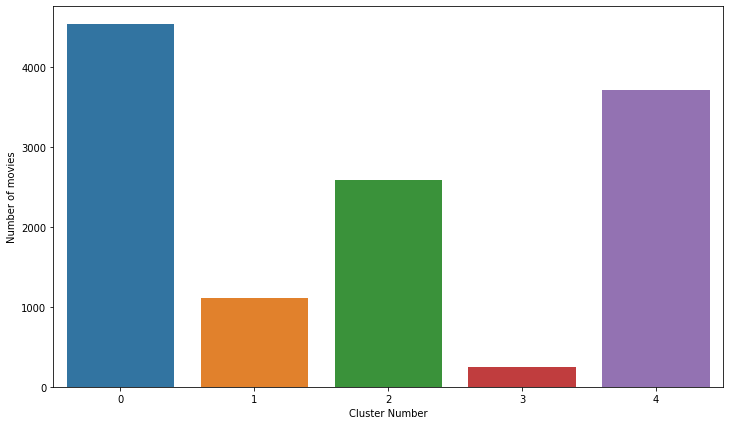

In [26]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [27]:
df_numeric.groupby(['cluster']).mean()

,revenue,runtime,vote_average,vote_count
cluster,,,,
0,1.503005e+07,101.019430,6.231795,175.266726
1,1.652781e+08,114.384964,6.227536,1156.980978
2,1.092899e+07,94.119195,5.020511,126.905186
3,6.358566e+08,126.371542,6.917787,4802.359684
4,1.640060e+07,109.595469,7.283198,300.742449


최대 득표수(카운트 기준)를 달성한 영화의 클러스터 

인기도도 매우 높고, 총 런타임, 순이익도 높음.

In [29]:
size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)
size_array

[4529, 1104, 2584, 253, 3708]

In [30]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
30401,180000000,41.051421,809342332.0,133.0,7.2,5612.0,Fantastic Beasts and Where to Find Them,3
10598,207000000,19.761164,550000000.0,187.0,6.6,2403.0,King Kong,3
18092,170000000,14.046164,185770160.0,126.0,7.0,2197.0,Hugo,3
760,75000000,17.634197,816969268.0,145.0,6.7,3334.0,Independence Day,3
18685,260000000,14.670353,284139100.0,132.0,6.1,2170.0,John Carter,3


두 번째로 높은 투표 수와 가장 높은 등급의 영화들

런타임 길고, 인기 점수 좋은 영화의 클러스터

In [31]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
21407,37000000,18.474368,269994119.0,110.0,6.8,3053.0,We're the Millers,1
31444,75000000,14.656875,108145109.0,116.0,7.1,2306.0,The Man from U.N.C.L.E.,1
30146,35000000,17.310647,140795793.0,125.0,5.9,1193.0,Trainwreck,1
11104,64000000,7.067602,101595121.0,98.0,5.3,269.0,Little Man,1
10398,50000000,10.022102,44434439.0,110.0,5.8,466.0,Into the Blue,1


가장 성공 못한 영화.. 

가장 적은 수의 투표를 받은, 런타임, 수익, 인기 점수가 가장 낮은 영화의 클러스터

In [32]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
5720,0,5.082509,0.0,98.0,6.3,147.0,Cabbage Soup,0
1093,1000000,9.194572,21378361.0,89.0,6.4,318.0,The Fog,0
7272,33000000,18.250919,54700105.0,124.0,6.1,786.0,The Punisher,0
44925,40000000,30.146847,0.0,88.0,5.9,91.0,The House,0
6574,0,8.507688,27540561.0,105.0,6.7,47.0,Once Upon a Time in China III,0
